In [1]:
from numpy import array
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Bidirectional
from keras.layers import Flatten
from keras.layers import TimeDistributed
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers import ConvLSTM2D
from keras.layers import RepeatVector
from keras.layers import Dropout
from numpy import hstack
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def form(yhat,y,mode,ix=3):
    tp=[]
    tn=[]
    fn=[]
    fp=[]
    if mode==1:
        for index,i in enumerate(yhat):
            result=i[ix]-y[index-1,ix]
            if index==0:
                continue
            if y[index-1,ix]>y[index,ix]:#dusmus
                if result>0: 
                    fn.append(abs(i[ix]-y[index,ix]))#negatif
                else:
                    tn.append(abs(i[ix]-y[index,ix]))
            else:  #artmis
                if result>0: 
                    tp.append(abs(i[ix]-y[index,ix]))#negatif
                else:
                    fp.append(abs(i[ix]-y[index,ix]))
    elif mode==0:
        for index,i in enumerate(yhat):
            result=i-y[index-1]
            if index==0:
                continue
            if y[index-1]>y[index]:#dusmus
                if result>0: 
                    fn.append(abs(i-y[index]))#negatif
                else:
                    tn.append(abs(i-y[index]))
            else:  #artmis
                if result>0: 
                    tp.append(abs(i-y[index]))#negatif
                else:
                    fp.append(abs(i-y[index]))
        
    print()
    print('Mean')
    print([np.mean(tp),np.mean(fp)])
    print([np.mean(fn),np.mean(tn)])
    print()
    print('Count')
    print([len(tp),len(fp)])
    print([len(fn),len(tn)])
    print()
    print('Max')
    if len(tp)!=0:
        print(np.max(tp),end=',')
    else:
        print(0,end=',')
    if len(fp)!=0:
        print(np.max(fp),end=' ')
    else:
        print(0,end=' ')
    print()
    if len(fn)!=0:
        print(np.max(fn),end=',')
    else:
        print(0,end=',')
    if len(tn)!=0:
        print(np.max(tn),end=' ') 
    else:
        print(0,end=' ')
    print()

# ===============================================================
# ===============================================================
# Univariate LSTM Models
# ===============================================================
# ===============================================================

# Vanilia LSTM


In [3]:
# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the sequence
        if end_ix > len(sequence)-1:
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)
 
# define input sequence
raw_seq = pd.read_csv('train.csv')['close'].values
# choose a number of time steps
n_steps = 3
# split into samples
X, y = split_sequence(raw_seq, n_steps)

# reshape from [samples, timesteps] into [samples, timesteps, features]

n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))
# define model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(n_steps, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse',metrics=['accuracy'])
# fit model
model.fit(X, y, epochs=200)

Epoch 1/200
58/58 [==============================] - 14s 20ms/step - loss: 33466670.8814 - accuracy: 0.0000e+00
Epoch 2/200
58/58 [==============================] - 1s 20ms/step - loss: 5332763.4386 - accuracy: 0.0000e+00 0s - loss: 7846873.1048 - ac
Epoch 3/200
58/58 [==============================] - 1s 15ms/step - loss: 143852.6282 - accuracy: 0.0000e+00
Epoch 4/200
58/58 [==============================] - 1s 21ms/step - loss: 129758.2026 - accuracy: 0.0000e+00
Epoch 5/200
58/58 [==============================] - 1s 21ms/step - loss: 120774.5527 - accuracy: 0.0000e+00
Epoch 6/200
58/58 [==============================] - 1s 19ms/step - loss: 162951.6028 - accuracy: 0.0000e+00
Epoch 7/200
58/58 [==============================] - 1s 17ms/step - loss: 132440.3445 - accuracy: 0.0000e+00
Epoch 8/200
58/58 [==============================] - 1s 16ms/step - loss: 157456.9578 - accuracy: 0.0000e+00: 0s - loss: 169414.1098 - accuracy
Epoch 9/200
58/58 [==============================] - 1s 19ms

58/58 [==============================] - 1s 20ms/step - loss: 149291.8093 - accuracy: 0.0000e+00: 1s - loss: 136435.9180 - accuracy: 0.0000e+ - ETA: 0s - loss: 169566.0833 - accuracy: 0. - ETA: 0s - loss: 155474.3698 - accuracy: 0.000
Epoch 61/200
58/58 [==============================] - 1s 16ms/step - loss: 105404.9339 - accuracy: 0.0000e+001s - loss: 68058.2
Epoch 62/200
58/58 [==============================] - 1s 14ms/step - loss: 112032.9435 - accuracy: 0.0000e+00
Epoch 63/200
58/58 [==============================] - 0s 4ms/step - loss: 104765.3853 - accuracy: 0.0000e+00
Epoch 64/200
58/58 [==============================] - 1s 15ms/step - loss: 129637.1947 - accuracy: 0.0000e+00: 0s - loss: 135113.4183 - accuracy: 0.0 - ETA: 0s - loss: 129676.7789 - accuracy: 0.0000e+0
Epoch 65/200
58/58 [==============================] - 1s 18ms/step - loss: 141280.5187 - accuracy: 0.0000e+00
Epoch 66/200
58/58 [==============================] - 1s 13ms/step - loss: 127633.2345 - accuracy: 0.0000e

58/58 [==============================] - 1s 10ms/step - loss: 100565.7262 - accuracy: 0.0000e+00
Epoch 122/200
58/58 [==============================] - 1s 16ms/step - loss: 124897.4644 - accuracy: 0.0000e+00
Epoch 123/200
58/58 [==============================] - 1s 24ms/step - loss: 100049.1316 - accuracy: 0.0000e+00: 1s - loss: 114652.2595
Epoch 124/200
58/58 [==============================] - 1s 14ms/step - loss: 122612.2360 - accuracy: 0.0000e+00
Epoch 125/200
58/58 [==============================] - 0s 6ms/step - loss: 126498.7597 - accuracy: 0.0000e+00
Epoch 126/200
58/58 [==============================] - 1s 16ms/step - loss: 107806.5957 - accuracy: 0.0000e+00
Epoch 127/200
58/58 [==============================] - 1s 25ms/step - loss: 123824.6230 - accuracy: 0.0000e+00
Epoch 128/200
58/58 [==============================] - 1s 10ms/step - loss: 115335.3829 - accuracy: 0.0000e+00
Epoch 129/200
58/58 [==============================] - 0s 4ms/step - loss: 87375.6120 - accuracy: 0.000

58/58 [==============================] - 0s 3ms/step - loss: 79824.8579 - accuracy: 0.0000e+00
Epoch 194/200
58/58 [==============================] - 0s 3ms/step - loss: 97802.1742 - accuracy: 0.0000e+00
Epoch 195/200
58/58 [==============================] - 0s 4ms/step - loss: 85635.0690 - accuracy: 0.0000e+00
Epoch 196/200
58/58 [==============================] - 0s 4ms/step - loss: 78685.7698 - accuracy: 0.0000e+00
Epoch 197/200
58/58 [==============================] - 0s 3ms/step - loss: 78942.8245 - accuracy: 0.0000e+00
Epoch 198/200
58/58 [==============================] - 0s 3ms/step - loss: 110593.3390 - accuracy: 0.0000e+00
Epoch 199/200
58/58 [==============================] - 0s 4ms/step - loss: 78797.5781 - accuracy: 0.0000e+00
Epoch 200/200
58/58 [==============================] - 0s 3ms/step - loss: 67987.6678 - accuracy: 0.0000e+00


In [4]:
# demonstrate prediction
yhat = model.predict(X)
form(yhat,y,mode=0)


Mean
[69.1707, 272.16757]
[115.38164, 179.60474]

Count
[748, 254]
[590, 262]

Max
2060.2725,3998.6016 
1904.9736,2303.581 


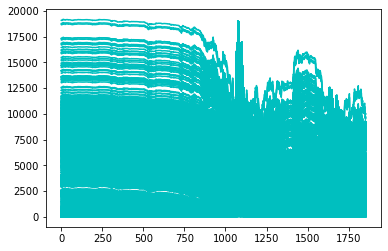

In [8]:
from matplotlib.pyplot import figure


fig, ax = plt.subplots()
#figure(figsize=(80, 60))
ax.plot(np.abs(yhat-y),color='c')
plt.show()

In [15]:
yhat.shape

(1855, 1)

In [18]:
y=y.reshape((1855,1))

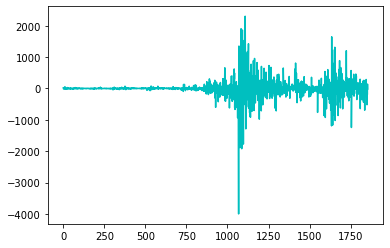

In [22]:
x=yhat-y
fig, ax = plt.subplots(figsize=(80, 60))
ax.plot(x,color='c')

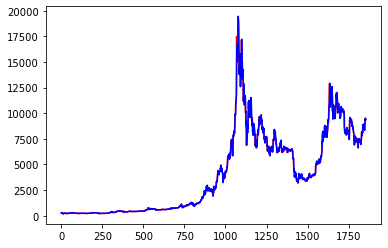

In [40]:
fig, ax = plt.subplots(figsize=(100,100))
ax.plot(y,color="r")
ax.plot(yhat,color="b")

In [23]:
# define input sequence
raw_seq = pd.read_csv('test.csv')['close'].values
# choose a number of time steps
n_steps = 3
# split into samples
X, y = split_sequence(raw_seq, n_steps)
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))
yhat = model.predict(X)
form(yhat,y,mode=0)


Mean
[294.89255, 464.7687]
[469.5915, 261.34662]

Count
[112, 113]
[64, 105]

Max
3251.8594,3060.75 
4688.0,3094.1504 


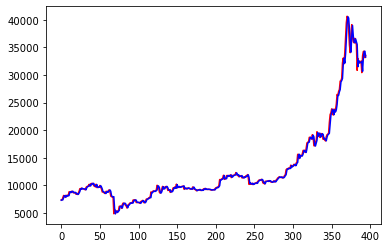

In [24]:
fig, ax = plt.subplots()
ax.plot(y,color="r")
ax.plot(yhat,color="b")

In [28]:
yhat.shape

(395, 1)

In [31]:
y=y.reshape((395,1))

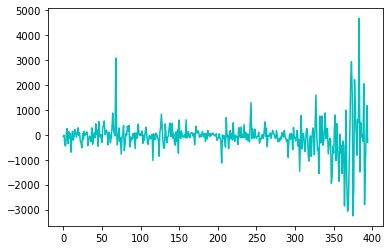

In [32]:
x=yhat-y
fig, ax = plt.subplots()
ax.plot(x,color='c')

# Stacked LSTM

In [43]:
# split a univariate sequence
def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the sequence
        if end_ix > len(sequence)-1:
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)
 
# define input sequence
raw_seq = pd.read_csv('train.csv')['close'].values
# choose a number of time steps
n_steps = 3
# split into samples
X, y = split_sequence(raw_seq, n_steps)
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))
# define model
model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(X, y, epochs=200)

Epoch 1/200
58/58 [==============================] - 4s 4ms/step - loss: 32861539.8983
Epoch 2/200
58/58 [==============================] - 0s 5ms/step - loss: 344521.9174
Epoch 3/200
58/58 [==============================] - 0s 4ms/step - loss: 144213.9419
Epoch 4/200
58/58 [==============================] - 0s 4ms/step - loss: 161799.5139
Epoch 5/200
58/58 [==============================] - 0s 4ms/step - loss: 138574.0144
Epoch 6/200
58/58 [==============================] - 0s 4ms/step - loss: 132923.5959
Epoch 7/200
58/58 [==============================] - 0s 4ms/step - loss: 135616.3609
Epoch 8/200
58/58 [==============================] - 0s 4ms/step - loss: 146333.5716
Epoch 9/200
58/58 [==============================] - 0s 4ms/step - loss: 165267.3769
Epoch 10/200
58/58 [==============================] - 0s 4ms/step - loss: 123090.9303
Epoch 11/200
58/58 [==============================] - 0s 5ms/step - loss: 130881.8835
Epoch 12/200
58/58 [==============================] - 0s 4ms/

58/58 [==============================] - 0s 4ms/step - loss: 85316.9323
Epoch 192/200
58/58 [==============================] - 0s 4ms/step - loss: 100646.3359
Epoch 193/200
58/58 [==============================] - 0s 4ms/step - loss: 86247.1872
Epoch 194/200
58/58 [==============================] - 0s 4ms/step - loss: 102767.1063
Epoch 195/200
58/58 [==============================] - 0s 4ms/step - loss: 90502.0412
Epoch 196/200
58/58 [==============================] - 0s 4ms/step - loss: 80394.1526
Epoch 197/200
58/58 [==============================] - 0s 4ms/step - loss: 86398.1033
Epoch 198/200
58/58 [==============================] - 0s 4ms/step - loss: 79489.8234
Epoch 199/200
58/58 [==============================] - 0s 4ms/step - loss: 85967.6173
Epoch 200/200
58/58 [==============================] - ETA: 0s - loss: 80416.910 - 0s 4ms/step - loss: 80367.3145


In [44]:
# demonstrate prediction
yhat = model.predict(X)
form(yhat,y,mode=0)


Mean
[103.14047, 331.0407]
[157.01457, 478.10355]

Count
[997, 5]
[845, 7]

Max
3724.587,841.5762 
2399.6367,1246.8398 


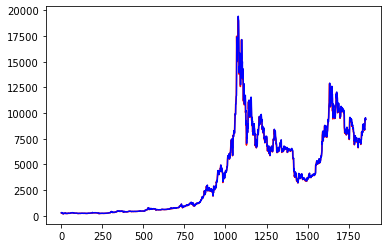

In [45]:
fig, ax = plt.subplots()
ax.plot(y,color="r")
ax.plot(yhat,color="b")

In [46]:
# define input sequence
raw_seq = pd.read_csv('test.csv')['close'].values
# choose a number of time steps
n_steps = 3
# split into samples
X, y = split_sequence(raw_seq, n_steps)
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))
yhat = model.predict(X)
form(yhat,y,mode=0)


Mean
[319.1231, 182.90015]
[416.37338, 4.370117]

Count
[223, 2]
[168, 1]

Max
3140.1875,207.94238 
4855.8906,4.370117 


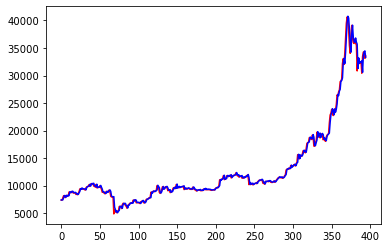

In [47]:
fig, ax = plt.subplots()
ax.plot(y,color="r")
ax.plot(yhat,color="b")

# Bidirectional LSTM

In [48]:

# split a univariate sequence
def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the sequence
        if end_ix > len(sequence)-1:
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)
 
# define input sequence
raw_seq = pd.read_csv('train.csv')['close'].values
# choose a number of time steps
n_steps = 3
# split into samples
X, y = split_sequence(raw_seq, n_steps)
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))
# define model
model = Sequential()
model.add(Bidirectional(LSTM(50, activation='relu'), input_shape=(n_steps, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(X, y, epochs=200)

Epoch 1/200
58/58 [==============================] - 3s 3ms/step - loss: 28174192.1017
Epoch 2/200
58/58 [==============================] - 0s 3ms/step - loss: 611069.6811
Epoch 3/200
58/58 [==============================] - 0s 3ms/step - loss: 111011.3852
Epoch 4/200
58/58 [==============================] - 0s 3ms/step - loss: 89756.8588
Epoch 5/200
58/58 [==============================] - 0s 3ms/step - loss: 105637.2005
Epoch 6/200
58/58 [==============================] - 0s 4ms/step - loss: 139509.6181
Epoch 7/200
58/58 [==============================] - 0s 3ms/step - loss: 119979.7966
Epoch 8/200
58/58 [==============================] - 0s 4ms/step - loss: 102942.9735
Epoch 9/200
58/58 [==============================] - 0s 4ms/step - loss: 103607.2645
Epoch 10/200
58/58 [==============================] - 0s 3ms/step - loss: 116100.7576
Epoch 11/200
58/58 [==============================] - 0s 4ms/step - loss: 102655.5140
Epoch 12/200
58/58 [==============================] - 0s 4ms/s

58/58 [==============================] - 0s 4ms/step - loss: 92756.5433
Epoch 191/200
58/58 [==============================] - 0s 3ms/step - loss: 104285.1359
Epoch 192/200
58/58 [==============================] - 0s 3ms/step - loss: 93345.1394
Epoch 193/200
58/58 [==============================] - 0s 3ms/step - loss: 95144.4298
Epoch 194/200
58/58 [==============================] - 0s 3ms/step - loss: 82164.6588
Epoch 195/200
58/58 [==============================] - 0s 4ms/step - loss: 81684.8315
Epoch 196/200
58/58 [==============================] - 0s 4ms/step - loss: 89475.7092
Epoch 197/200
58/58 [==============================] - 0s 3ms/step - loss: 88143.5501
Epoch 198/200
58/58 [==============================] - 0s 4ms/step - loss: 95438.4267
Epoch 199/200
58/58 [==============================] - 0s 4ms/step - loss: 113572.9799
Epoch 200/200
58/58 [==============================] - 0s 3ms/step - loss: 81080.5863


In [49]:
# demonstrate prediction
yhat = model.predict(X)
form(yhat,y,mode=0)


Mean
[159.66914, 181.09479]
[275.70743, 97.43283]

Count
[40, 962]
[19, 833]

Max
1161.6465,4280.9766 
1320.3594,2141.29 


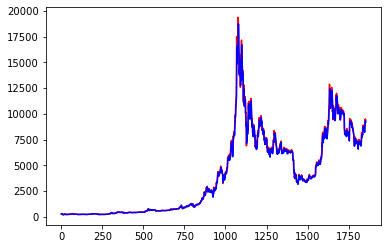

In [50]:
fig, ax = plt.subplots()
ax.plot(y,color="r")
ax.plot(yhat,color="b")

In [51]:
# define input sequence
raw_seq = pd.read_csv('test.csv')['close'].values
# choose a number of time steps
n_steps = 3
# split into samples
X, y = split_sequence(raw_seq, n_steps)
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))
yhat = model.predict(X)
form(yhat,y,mode=0)


Mean
[657.27374, 597.71985]
[262.49966, 254.50758]

Count
[3, 222]
[3, 166]

Max
1672.1973,3792.2734 
467.79736,4182.254 


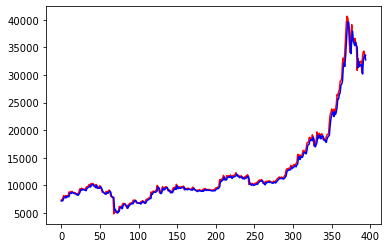

In [52]:
fig, ax = plt.subplots()
ax.plot(y,color="r")
ax.plot(yhat,color="b")

# CNN LSTM

In [53]:

# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the sequence
        if end_ix > len(sequence)-1:
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)
 
# define input sequence
raw_seq = pd.read_csv('train.csv')['close'].values
# choose a number of time steps
n_steps = 4
# split into samples
X, y = split_sequence(raw_seq, n_steps)
# reshape from [samples, timesteps] into [samples, subsequences, timesteps, features]
n_features = 1
n_seq = 2
n_steps = 2
X = X.reshape((X.shape[0], n_seq, n_steps, n_features))
# define model
model = Sequential()
model.add(TimeDistributed(Conv1D(filters=64, kernel_size=1, activation='relu'), input_shape=(None, n_steps, n_features)))
model.add(TimeDistributed(MaxPooling1D(pool_size=2)))
model.add(TimeDistributed(Flatten()))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(X, y, epochs=500, verbose=0)

In [54]:
# demonstrate prediction
yhat = model.predict(X)
form(yhat,y,mode=0)


Mean
[58.77008, 305.10724]
[154.3052, 146.04436]

Count
[603, 398]
[480, 372]

Max
1177.958,3864.3164 
2444.0967,2017.2607 


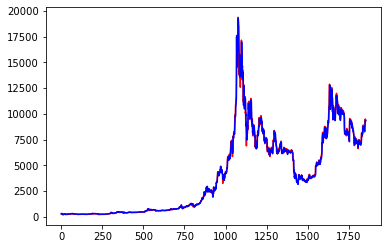

In [55]:
fig, ax = plt.subplots()
ax.plot(y,color="r")
ax.plot(yhat,color="b")

In [64]:
# define input sequence
raw_seq = pd.read_csv('test.csv')['close'].values
# choose a number of time steps
n_steps = 4
# split into samples
X, y = split_sequence(raw_seq, n_steps)
n_features = 1
n_seq = 2
n_steps = 2
X = X.reshape((X.shape[0], n_seq, n_steps, n_features))
yhat = model.predict(X)
form(yhat,y,mode=0)


Mean
[395.5656, 552.4089]
[977.75543, 225.8467]

Count
[52, 172]
[22, 147]

Max
2999.668,3396.4258 
4010.7148,4324.121 


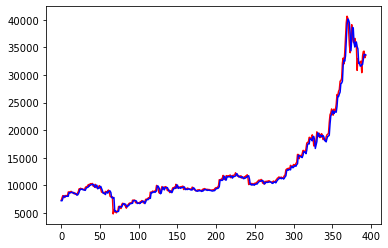

In [65]:
fig, ax = plt.subplots()
ax.plot(y,color="r")
ax.plot(yhat,color="b")

#  Conv LSTM

In [66]:
# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the sequence
        if end_ix > len(sequence)-1:
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)
 
# define input sequence
raw_seq = pd.read_csv('train.csv')['close'].values
# choose a number of time steps
n_steps = 4
# split into samples
X, y = split_sequence(raw_seq, n_steps)
# reshape from [samples, timesteps] into [samples, timesteps, rows, columns, features]
n_features = 1
n_seq = 2
n_steps = 2
X = X.reshape((X.shape[0], n_seq, 1, n_steps, n_features))
# define model
model = Sequential()
model.add(ConvLSTM2D(filters=64, kernel_size=(1,2), activation='relu', input_shape=(n_seq, 1, n_steps, n_features)))
model.add(Flatten())
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(X, y, epochs=500)

Epoch 1/500
58/58 [==============================] - 5s 4ms/step - loss: 22476640.0000
Epoch 2/500
58/58 [==============================] - 0s 4ms/step - loss: 1590048.5858
Epoch 3/500
58/58 [==============================] - 0s 4ms/step - loss: 161740.6692
Epoch 4/500
58/58 [==============================] - 0s 5ms/step - loss: 155221.8583
Epoch 5/500
58/58 [==============================] - 0s 4ms/step - loss: 159558.6867
Epoch 6/500
58/58 [==============================] - 0s 4ms/step - loss: 184471.2002
Epoch 7/500
58/58 [==============================] - 0s 4ms/step - loss: 184346.6259
Epoch 8/500
58/58 [==============================] - 0s 4ms/step - loss: 173057.1306
Epoch 9/500
58/58 [==============================] - 0s 4ms/step - loss: 196030.8521
Epoch 10/500
58/58 [==============================] - 0s 4ms/step - loss: 151931.1043
Epoch 11/500
58/58 [==============================] - 0s 4ms/step - loss: 148236.4199
Epoch 12/500
58/58 [==============================] - 0s 5ms

58/58 [==============================] - 0s 5ms/step - loss: 78327.9335
Epoch 192/500
58/58 [==============================] - 0s 4ms/step - loss: 81535.7121
Epoch 193/500
58/58 [==============================] - 0s 4ms/step - loss: 74938.7586
Epoch 194/500
58/58 [==============================] - 0s 4ms/step - loss: 92073.2278
Epoch 195/500
58/58 [==============================] - 0s 4ms/step - loss: 77584.6845
Epoch 196/500
58/58 [==============================] - 0s 4ms/step - loss: 113785.8455
Epoch 197/500
58/58 [==============================] - 0s 5ms/step - loss: 78718.1893
Epoch 198/500
58/58 [==============================] - 0s 7ms/step - loss: 68920.3875
Epoch 199/500
58/58 [==============================] - 0s 7ms/step - loss: 90141.7305
Epoch 200/500
58/58 [==============================] - 0s 6ms/step - loss: 88748.3902
Epoch 201/500
58/58 [==============================] - 0s 6ms/step - loss: 85788.1631
Epoch 202/500
58/58 [==============================] - 0s 5ms/step 

58/58 [==============================] - 0s 4ms/step - loss: 89778.3259
Epoch 287/500
58/58 [==============================] - 0s 4ms/step - loss: 85745.2164
Epoch 288/500
58/58 [==============================] - 0s 4ms/step - loss: 94774.6096
Epoch 289/500
58/58 [==============================] - 0s 4ms/step - loss: 99230.0807
Epoch 290/500
58/58 [==============================] - 0s 4ms/step - loss: 74761.3789
Epoch 291/500
58/58 [==============================] - 0s 4ms/step - loss: 96997.8958
Epoch 292/500
58/58 [==============================] - 0s 4ms/step - loss: 73007.1883
Epoch 293/500
58/58 [==============================] - 0s 4ms/step - loss: 78749.2346
Epoch 294/500
58/58 [==============================] - 0s 4ms/step - loss: 77736.0004
Epoch 295/500
58/58 [==============================] - 0s 4ms/step - loss: 88101.3546
Epoch 296/500
58/58 [==============================] - 0s 5ms/step - loss: 68992.1268
Epoch 297/500
58/58 [==============================] - 0s 4ms/step -

58/58 [==============================] - 0s 4ms/step - loss: 81889.4991
Epoch 382/500
58/58 [==============================] - 0s 4ms/step - loss: 87650.9609
Epoch 383/500
58/58 [==============================] - 0s 5ms/step - loss: 107728.9020
Epoch 384/500
58/58 [==============================] - 0s 4ms/step - loss: 76152.3872
Epoch 385/500
58/58 [==============================] - 0s 4ms/step - loss: 120172.6257
Epoch 386/500
58/58 [==============================] - 0s 4ms/step - loss: 81041.5777
Epoch 387/500
58/58 [==============================] - 0s 4ms/step - loss: 72574.0939
Epoch 388/500
58/58 [==============================] - 0s 4ms/step - loss: 80479.9073
Epoch 389/500
58/58 [==============================] - 0s 4ms/step - loss: 63429.9620
Epoch 390/500
58/58 [==============================] - 0s 5ms/step - loss: 83233.1768
Epoch 391/500
58/58 [==============================] - 0s 4ms/step - loss: 88967.4148
Epoch 392/500
58/58 [==============================] - 0s 4ms/step

In [67]:
# demonstrate prediction
yhat = model.predict(X)
form(yhat,y,mode=0)


Mean
[95.03783, nan]
[187.66649, 1128.3193]

Count
[1001, 0]
[851, 1]

Max
3579.126,0 
2509.0947,1128.3193 


C:\Users\suca\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\suca\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


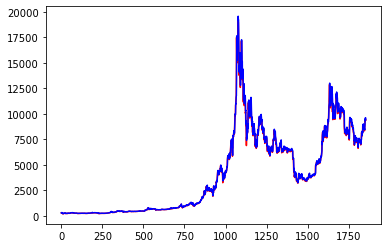

In [68]:
fig, ax = plt.subplots()
ax.plot(y,color="r")
ax.plot(yhat,color="b")

In [69]:
# define input sequence
raw_seq = pd.read_csv('test.csv')['close'].values
# choose a number of time steps
n_steps = 4
# split into samples
X, y = split_sequence(raw_seq, n_steps)
n_features = 1
n_seq = 2
n_steps = 2
X = X.reshape((X.shape[0], n_seq, 1, n_steps, n_features))
yhat = model.predict(X)
form(yhat,y,mode=0)


Mean
[275.71365, nan]
[500.44852, nan]

Count
[224, 0]
[169, 0]

Max
2853.7422,0 
5096.121,0 


C:\Users\suca\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\suca\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


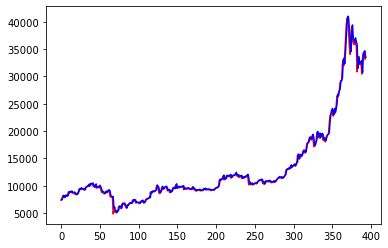

In [70]:
fig, ax = plt.subplots()
ax.plot(y,color="r")
ax.plot(yhat,color="b")

# ===============================================================
# ===============================================================
# Multivariate LSTM Models
# ===============================================================
# ===============================================================

# Multiple Input Series

In [71]:
# split a multivariate sequence into samples
def split_sequences(sequences, n_steps):
    X, y = list(), list()
    for i in range(len(sequences)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the dataset
        if end_ix > len(sequences):
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequences[i:end_ix, :-1], sequences[end_ix-1, -1]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)
 
dataset= pd.read_csv('train.csv').values
# choose a number of time steps
n_steps = 3
# convert into input/output
X, y = split_sequences(dataset, n_steps)
# the dataset knows the number of features, e.g. 2
n_features = X.shape[2]
# define model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(n_steps, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(X, y, epochs=200, verbose=0)

In [72]:
# demonstrate prediction
yhat = model.predict(X)
form(yhat,y,mode=0)


Mean
[43.731594, 72.15448]
[67.957405, 68.16122]

Count
[934, 68]
[221, 632]

Max
1210.627,632.4834 
606.78125,753.1113 


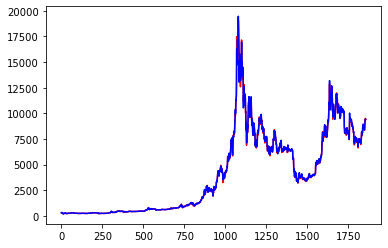

In [73]:
fig, ax = plt.subplots()
ax.plot(y,color="r")
ax.plot(yhat,color="b")

In [75]:
# define input sequence
raw_seq = pd.read_csv('test.csv').values
# choose a number of time steps
n_steps = 3
# split into samples
X, y = split_sequences(raw_seq, n_steps)
yhat = model.predict(X)
form(yhat,y,mode=0)


Mean
[126.71448, 176.08862]
[263.35648, 177.10797]

Count
[206, 20]
[36, 133]

Max
2287.5586,797.6172 
1813.6172,1917.5388 


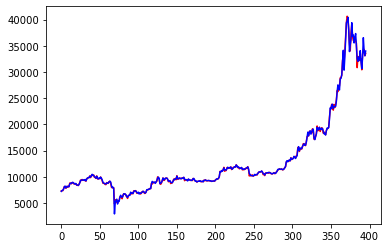

In [76]:
fig, ax = plt.subplots()
ax.plot(y,color="r")
ax.plot(yhat,color="b")

# Multiple Parallel Series

In [84]:
# split a multivariate sequence into samples
def split_sequences(sequences, n_steps):
    X, y = list(), list()
    for i in range(len(sequences)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the dataset
        if end_ix > len(sequences)-1:
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequences[i:end_ix, :], sequences[end_ix, :]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)

dataset= pd.read_csv('train.csv').values
# choose a number of time steps
n_steps = 3
# convert into input/output
X, y = split_sequences(dataset, n_steps)
# the dataset knows the number of features, e.g. 2
n_features = X.shape[2]

# define model
model = Sequential()
model.add(LSTM(100, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
model.add(LSTM(100, activation='relu'))
model.add(Dense(n_features))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(X, y, epochs=400)

In [86]:
# demonstrate prediction
yhat = model.predict(X)
form(yhat,y,mode=1)


Mean
[91.08323671283125, 462.4697715261159]
[155.12608845867473, 376.5569419093749]

Count
[974, 28]
[820, 32]

Max
3435.0082356249986,1853.7344578125012 
2526.2320134375004,1476.4763840625 


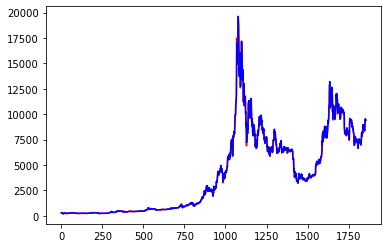

In [87]:
fig, ax = plt.subplots()
ax.plot(y[:,3],color="r")
ax.plot(yhat[:,3],color="b")

In [88]:
# define input sequence
raw_seq = pd.read_csv('test.csv').values
# choose a number of time steps
n_steps = 3
# split into samples
X, y = split_sequences(raw_seq, n_steps)
yhat = model.predict(X)
form(yhat,y,mode=1)


Mean
[280.43889579216506, 898.0108861699208]
[352.28918199064503, 1254.4069495885417]

Count
[209, 16]
[157, 12]

Max
3007.768767499998,3014.075627499995 
3103.7675305000002,4560.973298750003 


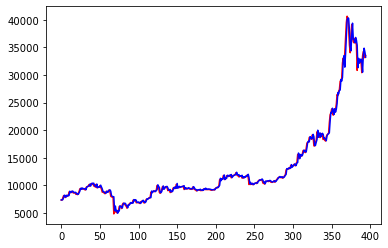

In [89]:
fig, ax = plt.subplots()
ax.plot(y[:,3],color="r")
ax.plot(yhat[:,3],color="b")

# ===============================================================
# ===============================================================
# Multi-step LSTM Models
# ===============================================================
# ===============================================================

# Vector Output Model

In [90]:
# split a univariate sequence into samples
def split_sequence(sequence, n_steps_in, n_steps_out):
    X, y = list(), list()
    for i in range(len(sequence)):
        # find the end of this pattern
        end_ix = i + n_steps_in
        out_end_ix = end_ix + n_steps_out
        # check if we are beyond the sequence
        if out_end_ix > len(sequence):
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix:out_end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)
 
# define input sequence
raw_seq = pd.read_csv('train.csv')['close'].values
# choose a number of time steps
n_steps_in, n_steps_out = 3, 2
# split into samples
X, y = split_sequence(raw_seq, n_steps_in, n_steps_out)
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))
# define model
model = Sequential()
model.add(LSTM(100, activation='relu', return_sequences=True, input_shape=(n_steps_in, n_features)))
model.add(LSTM(100, activation='relu'))
model.add(Dense(n_steps_out))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(X, y, epochs=50)

Epoch 1/50
58/58 [==============================] - 3s 6ms/step - loss: 18847709.3729
Epoch 2/50
58/58 [==============================] - 0s 6ms/step - loss: 216426.7084
Epoch 3/50
58/58 [==============================] - 0s 6ms/step - loss: 250032.1838
Epoch 4/50
58/58 [==============================] - 0s 6ms/step - loss: 205870.7578
Epoch 5/50
58/58 [==============================] - 0s 6ms/step - loss: 195387.8371
Epoch 6/50
58/58 [==============================] - 0s 6ms/step - loss: 221445.9719
Epoch 7/50
58/58 [==============================] - 0s 6ms/step - loss: 223643.5749
Epoch 8/50
58/58 [==============================] - 0s 6ms/step - loss: 297189.8072
Epoch 9/50
58/58 [==============================] - 0s 6ms/step - loss: 219559.0185
Epoch 10/50
58/58 [==============================] - 0s 6ms/step - loss: 191549.8490
Epoch 11/50
58/58 [==============================] - 0s 6ms/step - loss: 229726.3001
Epoch 12/50
58/58 [==============================] - 0s 6ms/step - loss:

In [92]:
# demonstrate prediction
yhat = model.predict(X)
form(yhat,y,mode=1,ix=0)


Mean
[127.14134122841483, 177.497842102079]
[285.0086877259986, 95.82644152030359]

Count
[95, 906]
[62, 790]

Max
1108.097401250001,4426.621516874999 
1967.7732406249997,2214.5904118750004 


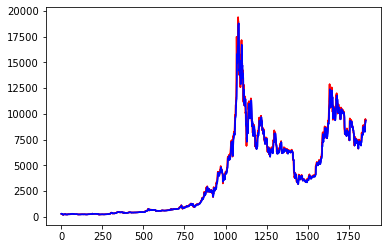

In [93]:
fig, ax = plt.subplots()
ax.plot(y,color="r")
ax.plot(yhat,color="b")

In [95]:
# define input sequence
raw_seq = pd.read_csv('test.csv')['close'].values
# choose a number of time steps
n_steps = 3
# split into samples
X, y = split_sequence(raw_seq, n_steps_in, n_steps_out)
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))
yhat = model.predict(X)
form(yhat,y,mode=1,ix=0)


Mean
[723.0268116778848, 566.3756131897215]
[873.0230908124997, 242.56109516878865]

Count
[13, 211]
[7, 162]

Max
3121.237517499998,4080.780907499997 
2761.6614499999996,4370.305330000003 


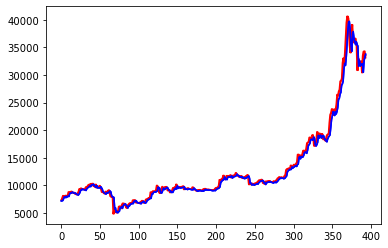

In [96]:
fig, ax = plt.subplots()
ax.plot(y,color="r")
ax.plot(yhat,color="b")

# Encoder-Decoder LSTM

In [97]:
# split a univariate sequence into samples
def split_sequence(sequence, n_steps_in, n_steps_out):
    X, y = list(), list()
    for i in range(len(sequence)):
        # find the end of this pattern
        end_ix = i + n_steps_in
        out_end_ix = end_ix + n_steps_out
        # check if we are beyond the sequence
        if out_end_ix > len(sequence):
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix:out_end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)
 
# define input sequence
raw_seq = pd.read_csv('train.csv')['close'].values 
# choose a number of time steps
n_steps_in, n_steps_out = 3, 2
# split into samples
X, y = split_sequence(raw_seq, n_steps_in, n_steps_out)
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))
y = y.reshape((y.shape[0], y.shape[1], n_features))
# define model
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(n_steps_in, n_features)))
model.add(RepeatVector(n_steps_out))
model.add(LSTM(100, activation='relu', return_sequences=True))
model.add(TimeDistributed(Dense(1)))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(X, y, epochs=100, verbose=0)

In [98]:
# demonstrate prediction
yhat = model.predict(X)
form(yhat,y,mode=1,ix=0)


Mean
[96.27599887664327, nan]
[177.09878471890636, nan]

Count
[1001, 0]
[852, 0]

Max
3689.6888996874986,0 
2466.1734196875004,0 


C:\Users\suca\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\suca\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


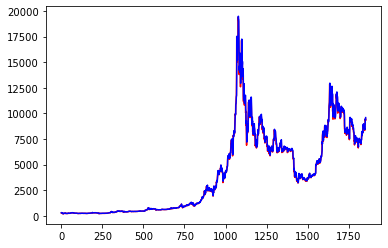

In [100]:
fig, ax = plt.subplots()
ax.plot(y[:,0],color="r")
ax.plot(yhat[:,0],color="b")

In [103]:
# define input sequence
raw_seq = pd.read_csv('test.csv')['close'].values
# choose a number of time steps
n_steps = 3
# split into samples
X, y = split_sequence(raw_seq, n_steps_in, n_steps_out)
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))
y = y.reshape((y.shape[0], y.shape[1], n_features))
yhat = model.predict(X)
form(yhat,y,mode=1,ix=0)


Mean
[284.56739574162947, nan]
[469.00465055713767, nan]

Count
[224, 0]
[169, 0]

Max
2791.854704999998,0 
5033.442048750003,0 


C:\Users\suca\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\suca\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


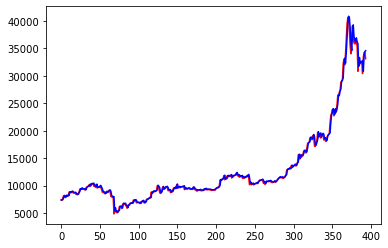

In [104]:
fig, ax = plt.subplots()
ax.plot(y[:,0],color="r")
ax.plot(yhat[:,0],color="b")